In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data=pd.read_csv("RTA Dataset.csv")
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [3]:
data['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
data.describe().T

count      mean       std  min  25%  50%  75%  \
Number_of_vehicles_involved  12316.0  2.040679  0.688790  1.0  2.0  2.0  2.0   
Number_of_casualties         12316.0  1.548149  1.007179  1.0  1.0  1.0  2.0   

                             max  
Number_of_vehicles_involved  7.0  
Number_of_casualties         8.0

In [6]:
data.dropna(how='all', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [10]:
numerical_columns = data.select_dtypes(include=['number'])
non_numeric_columns = data.select_dtypes(include=['object']).columns
print(non_numeric_columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


<Axes: >

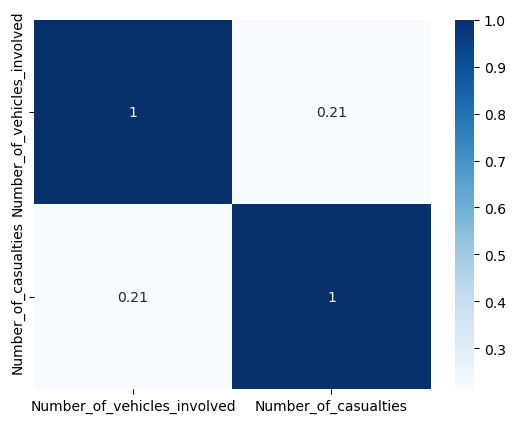

In [11]:
import pandas as pd
import seaborn as sns

numerical_columns = data.select_dtypes(include=['number'])

correlation = numerical_columns.corr()

sns.heatmap(correlation, annot=True, cmap='Blues')

In [12]:
px.pie(data, data['Sex_of_driver'], data['Number_of_casualties'], template='ggplot2',hole=0.5)

In [13]:
px.violin(data,data['Road_surface_type'], data['Number_of_casualties'],color='Accident_severity',template='ggplot2')

In [14]:
px.pie(data,data['Accident_severity'],data['Number_of_casualties'],color='Accident_severity',template='ggplot2',hole=0.5)

In [15]:
px.pie(data,data['Cause_of_accident'],data['Number_of_casualties'],color='Cause_of_accident',template='ggplot2',hole=0.35)

In [16]:
px.histogram(data,data['Day_of_week'],data['Number_of_casualties'],color='Day_of_week',template='ggplot2')

In [17]:
px.histogram(data,data['Educational_level'],data['Number_of_casualties'],color='Educational_level',template='ggplot2')

In [18]:
px.histogram(data,data['Vehicle_driver_relation'],data['Number_of_casualties'],color='Vehicle_driver_relation',template='ggplot2')

In [19]:
df=data.copy(deep=True)
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [20]:
df['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [21]:
for column in df.columns[df.isnull().any()]:
    mode_value = df[column].mode()[0]  # Compute the mode of the column
    df[column].fillna(mode_value, inplace=True)

In [23]:
df['Accident_severity'].unique() 

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [24]:
severity_mapping = {'Fatal injury' : 1 , 'Serious Injury': 1, 'Slight Injury': 0}

# Convert the values in the 'accident_severity' column using the mapping dictionary
df['Accident_severity'] = data['Accident_severity'].map(severity_mapping)

In [25]:
data['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [26]:
df['Accident_severity'].unique() 

array([0, 1], dtype=int64)

In [27]:
# Print the list of columns in the DataFrame to check their names
print(df.columns)

# If needed, correct any typos in the column names specified for dropping
# Ensure that the columns you're trying to drop exist in the DataFrame

# If you've already dropped or renamed these columns earlier in your code, adjust the drop operation accordingly


Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [28]:
df.shape

(12316, 32)

In [29]:
df.size

394112

In [30]:
data['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [31]:
data['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [32]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)',
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [33]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [34]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr           Automobile   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                 Unknown  ...   Going straight   
3     Governmental                 Unknown  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4            Driver               Normal    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward                 0  
1                  Overtaking                 0  
2   Changing lane to the left                 1  
3  Changing lane to the right                 0  
4                  Overtaking                 0  

[5 rows x 32 columns]

In [35]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [36]:
df['Casualty_class'].unique()

array(['na', 'Driver or rider', 'Pedestrian', 'Passenger'], dtype=object)

In [37]:
for i in df.columns:
    if df[i].dtypes== object:
        print(i)
        print(df[i].unique())
        print(df[i].nunique())
        print()

Time
['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
1074

Day_of_week
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
7

Age_band_of_driver
['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
5

Sex_of_driver
['Male' 'Female' 'Unknown']
3

Educational_level
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
7

Vehicle_driver_relation
['Employee' 'Unknown' 'Owner' 'Other']
4

Driving_experience
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown']
7

Type_of_vehicle
['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
17

Owner_of_vehicle
['Owner' 'Governmental' 'Organization' 'Other']
4

Service_year_of_vehicle
['Above 10yr' '5-10yrs' 'Unknown' '1-2yr' '2-5y

In [38]:
mode_value = df['Educational_level'].mode()[0]  # Compute the mode of the column

# Fill missing values with the mode
df['Educational_level'].fillna(mode_value, inplace=True)

In [39]:
df.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr           Automobile   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                 Unknown  ...   Going straight   
3     Governmental                 Unknown  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4            Driver               Normal    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward                 0  
1                  Overtaking                 0  
2   Changing lane to the left                 1  
3  Changing lane to the right                 0  
4                  Overtaking                 0  

[5 rows x 32 columns]

In [40]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
for col in df.columns:
    if df[col].dtype == object:
        df[col] = l.fit_transform(df[col])

In [41]:
df.head()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0   420            1                   0              1                  0   
1   420            1                   1              1                  4   
2   420            1                   0              1                  4   
3   594            3                   0              1                  4   
4   594            3                   0              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   
2                        0                   0                5   
3                        0                   2               11   
4                        0                   1                0   

   Owner_of_vehicle  Service_year_of_vehicle  ...  Vehicle_movement  \
0                 3                        3  ...                 2   
1                 3                        2  ...                 2   
2                 3                        5  ...                 2   
3                 0                        5  ...                 2   
4                 3                        2  ...                 2   

   Casualty_class  Sex_of_casualty  Age_band_of_casualty  Casualty_severity  \
0               3                2                     5                  3   
1               3                2                     5                  3   
2               0                1                     1                  2   
3               2                0                     0                  2   
4               3                2                     5                  3   

   Work_of_casuality  Fitness_of_casuality  Pedestrian_movement  \
0                  0                     2                    5   
1                  0                     2                    5   
2                  0                     2                    5   
3                  0                     2                    5   
4                  0                     2                    5   

   Cause_of_accident  Accident_severity  
0                  9                  0  
1                 16                  0  
2                  0                  1  
3                  1                  0  
4                 16                  0  

[5 rows x 32 columns]

In [62]:
X=df.drop('Accident_severity',axis=1)
y=df['Accident_severity']

In [63]:
df['Accident_severity'].unique()

array([0, 1], dtype=int64)

In [65]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
X_train=mms.fit_transform(X_train)
X_test=mms.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

# MODEL TRAINING FOR ACCIDENT SEVERITY

In [82]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

                precision    recall  f1-score   support

  Fatal injury       0.78      0.19      0.30        37
Serious Injury       0.51      0.10      0.17       363
 Slight Injury       0.85      0.98      0.91      2064

      accuracy                           0.84      2464
     macro avg       0.71      0.42      0.46      2464
  weighted avg       0.80      0.84      0.79      2464



# Ensemble Model using Decision Trees and KNN 

In [68]:
base_classifiers = ensemble_model.estimators_

for clf in base_classifiers: # LIST OF BASE CLASSIFIERS
    clf_name = type(clf).__name__
    print("Classifier:", clf_name) 
    print("Parameters:", clf.get_params())
    print()


Classifier: KNeighborsClassifier
Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Classifier: DecisionTreeClassifier
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Classifier: LogisticRegression
Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}



In [69]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
X_train=mms.fit_transform(X_train)
X_test=mms.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

# KNN 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled, y_train) # for training

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8364448051948052


In [72]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Sample of X_train:", X_train.head())
print("Sample of y_train:", y_train.head())


Shape of X_train: (9852, 31)
Shape of y_train: (9852,)
Sample of X_train:       Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
6571   437            4                   4              1                  1   
7945   575            4                   0              1                  4   
9430   627            0                   1              1                  2   
549    203            5                   1              1                  4   
9290   352            4                   4              0                  4   

      Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
6571                        0                   4               10   
7945                        2                   2                0   
9430                        0                   0                9   
549                         2                   2                0   
9290                        0                   1                0   

      Owner_of_veh

# RandomForest and GridSearchCV

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
    
ypred=rf.predict(X_test)

print('-----------------------------------------------------------------------------------------------------------------------')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

print('confusion matrix :',confusion_matrix(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))
print('accuracy :',round(accuracy_score(y_test,y_pred),2))
print('precision :',round(precision_score(y_test,y_pred,average='weighted'),2))
print('recall :',round(recall_score(y_test,y_pred,average='weighted'),2))
print('f1 :',round(f1_score(y_test,y_pred,average='weighted'),2))
print()

-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[2060    4]
 [ 399    1]]
classification report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2064
           1       0.20      0.00      0.00       400

    accuracy                           0.84      2464
   macro avg       0.52      0.50      0.46      2464
weighted avg       0.73      0.84      0.76      2464

accuracy : 0.84
precision : 0.73
recall : 0.84
f1 : 0.76



In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8364448051948052


# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=2)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
    
ypred=rf.predict(X_test)

print('-----------------------------------------------------------------------------------------------------------------------')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

print('confusion matrix :',confusion_matrix(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))
print('accuracy :',round(accuracy_score(y_test,y_pred),2))
print('precision :',round(precision_score(y_test,y_pred,average='weighted'),2))
print('recall :',round(recall_score(y_test,y_pred,average='weighted'),2))
print('f1 :',round(f1_score(y_test,y_pred,average='weighted'),2))
print()

-----------------------------------------------------------------------------------------------------------------------
confusion matrix : [[2056    8]
 [ 387   13]]
classification report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2064
           1       0.62      0.03      0.06       400

    accuracy                           0.84      2464
   macro avg       0.73      0.51      0.49      2464
weighted avg       0.81      0.84      0.77      2464

accuracy : 0.84
precision : 0.81
recall : 0.84
f1 : 0.77



In [77]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8396915584415584


# Decision Trees and RandomForestClassifier ( Max Accuracy )


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = data.drop('Accident_severity', axis=1)  # Assuming 'target_variable' is the column you want to predict
y = data['Accident_severity']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8425324675324676


# SVM

In [81]:
from sklearn.svm import SVC
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear', random_state=42)  # You can also try different kernels like 'rbf'

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8400974025974026


# Natural Networks with Embeddings

In [80]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
import tensorflow as tf

label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

embedding_input_dim = max(X_train.max()) + 1 
model = Sequential()

for col in X_train.select_dtypes(include='int').columns:
    model.add(Embedding(input_dim=embedding_input_dim, output_dim=10, input_length=1))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, change activation function for multi-class

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change loss for multi-class

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

ModuleNotFoundError: No module named 'tensorflow'

# Prediction

In [215]:
import pickle 
with open('Classifier.pkl','wb') as file :
    pickle.dump(clf,file)